In [56]:
import pandas as pd

import matplotlib.pyplot as plt

FILENAME_WINDOWS = 'C:\\Uczelnia\\Semestr4\\Jezyki Skryptowe\\laby\\lab6JezykiS\\covid.txt'

df = pd.read_csv(FILENAME_WINDOWS, delimiter='\t')

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,25.11.2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,"7,1999829"
1,24.11.2020,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,"6,71367519"
2,23.11.2020,23,11,2020,252,8,Afghanistan,AF,AFG,38041757.0,Asia,"6,655844"
3,22.11.2020,22,11,2020,154,12,Afghanistan,AF,AFG,38041757.0,Asia,"6,20370926"
4,21.11.2020,21,11,2020,232,25,Afghanistan,AF,AFG,38041757.0,Asia,"6,13010593"


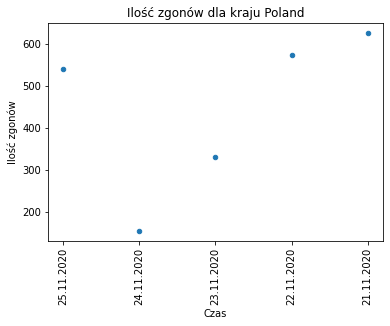

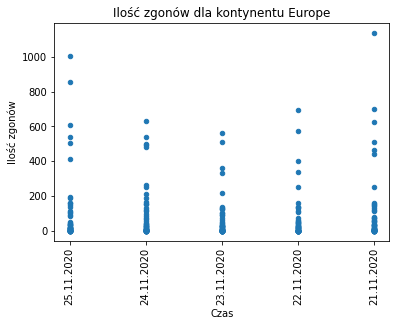

In [63]:
STARTDATE = '2020.11.21'
ENDDATE = '2020.11.25'

def take_data_from_dates(start, end, data):
    return data.loc[(
        (pd.to_datetime(data['dateRep'], errors='coerce', infer_datetime_format = True) >= start) & 
        (pd.to_datetime(data['dateRep'], errors='coerce', infer_datetime_format = True) <= end)
    )]

def take_deaths_or_cases(death_or_cases, data):
    if death_or_cases == 'd':
        return data.loc[:, ['dateRep', 'deaths', 'countriesAndTerritories']]
    elif death_or_cases == 'c':
        return data.loc[:, ['dateRep', 'cases', 'countriesAndTerritories']]
    else:
        raise Exception('Wpisz d żeby zobaczyć liczbę zgonów lub wpisz c żeby zobaczyć liczbę przypadków')

def draw_scatter_plot(start_date, end_date, country_or_continent, death_or_cases):
    # trafiliśmy na kraj
    if country_or_continent in df['countriesAndTerritories'].values:
        
        # tniemy dane wybierając to co chcemy
        country = country_or_continent
        data_country = df.loc[df['countriesAndTerritories'] == country]
        data_dates = take_data_from_dates(start_date, end_date, data_country)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)

        # rysujemy

        scatter_plot = data_values.plot(x='dateRep', y='deaths', kind='scatter', title='Ilość zgonów dla kraju %s' % country)
        plt.xticks(rotation=90)
        scatter_plot.set_xlabel('Czas')
        scatter_plot.set_ylabel('Ilość zgonów')
        plt.show()
        
    # trafiliśmy na kontynent    
    elif country_or_continent in df['continentExp'].values:
        
        # tniemy dane wybierając to co chcemy
        continent = country_or_continent
        data_continent = df.loc[df['continentExp'] == continent]
        data_dates = take_data_from_dates(start_date, end_date, data_continent)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)

        # rysujemy

        scatter_plot = data_values.plot(x='dateRep', y='deaths', kind='scatter', title='Ilość zgonów dla kontynentu %s' % continent)
        plt.xticks(rotation=90)
        scatter_plot.set_xlabel('Czas')
        scatter_plot.set_ylabel('Ilość zgonów')
        plt.show()
        
        
    # błędna nazwa
    else:
        raise Exception('Podana błędna nazwa kraju lub kontynentu')
    
draw_scatter_plot(STARTDATE, ENDDATE, 'Poland', 'd')
draw_scatter_plot(STARTDATE, ENDDATE, 'Europe', 'd')